In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizations

In [2]:
data = pd.read_csv("past_sales.csv")

In [3]:
data.head()

,Date,Seller,Tags,Buyer,Purchase Price,Link,VIN,CARFAX AMT,Reserve Price,Year,...,Trim,Stock #,Mileage,Score,Flag,90,95,100,105,110
0,11/19/23,Jean Dumas Kia - 9194-2318 Qc Inc,NaN,Leduc Automobile,1500,https://app.eblock.com/finished/sold?dateRanGT...,3FADP4EJXDM117146,-,"1,500.00",2013,...,5dr HB SE,-,148358,72/100,1.0,1707.0,2114.0,2521.0,2928.0,3335.0
1,11/18/23,CARS FOR TOYS,"Engine Needs Repair, Former US Vehicle, Out Of...",Magnes Auto Group Ltd.,7200,https://app.eblock.com/finished/sold?dateRanGT...,SALMP1E49BA349307,9882,-,2011,...,4WD 4dr SC Autobiography,APPRAISAL,166800,74/100,1.0,13852.0,14897.0,15943.0,16989.0,18034.0
2,11/18/23,Plaza Chevrolet Buick GMC,"OBDII Codes Present, Out Of Province Vehicle, ...",Global Amana Auto Corp,1800,https://app.eblock.com/finished/sold?dateRanGT...,5XYZUDLB5DG053700,1171,-,2013,...,AWD 4dr 2.4L Auto Luxury,23244B,334206,55/100,1.0,NaN,NaN,NaN,NaN,NaN
3,11/18/23,Baywest Inc - Baywest Nissan,NaN,Scarborough Auto Group - Octane Used Cars,16200,https://app.eblock.com/finished/sold?dateRanGT...,2T1BURHE9KC161442,-,-,2019,...,LE CVT,-,71065,92/100,1.0,15513.0,16648.0,17783.0,18918.0,20053.0
4,11/18/23,Mercedes-Benz Brampton,NaN,5027653 Ontario Inc.,15500,https://app.eblock.com/finished/sold?dateRanGT...,4JGDA2EB6DA159279,-,14000,2013,...,4MATIC 4dr ML 350 BlueTEC,-,187174,84/100,1.0,12383.0,13442.0,14501.0,15560.0,16619.0


In [4]:
data["Score"] = data["Score"].str.split("/").str[0].astype(int)

In [5]:
non_conforming_dates = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce').isna()
data.loc[non_conforming_dates, 'Date'] = pd.NaT
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce')

In [6]:
data.dtypes

Date              datetime64[ns]
Seller                    object
Tags                      object
Buyer                     object
Purchase Price             int64
Link                      object
VIN                       object
CARFAX AMT                object
Reserve Price             object
Year                       int64
Make                      object
Model                     object
Trim                      object
Stock #                   object
Mileage                    int64
Score                      int64
Flag                     float64
90                       float64
95                       float64
100                      float64
105                      float64
110                      float64
dtype: object

In [7]:
data = data[["Buyer", "Date", "Make", "Model", "Year", "Purchase Price", "Score", "Mileage", "90", "95", "100", "105", "110"]]

In [8]:
data.head()

,Buyer,Date,Make,Model,Year,Purchase Price,Score,Mileage,90,95,100,105,110
0,Leduc Automobile,2023-11-19,Ford,Fiesta,2013,1500,72,148358,1707.0,2114.0,2521.0,2928.0,3335.0
1,Magnes Auto Group Ltd.,2023-11-18,Land Rover,Range Rover,2011,7200,74,166800,13852.0,14897.0,15943.0,16989.0,18034.0
2,Global Amana Auto Corp,2023-11-18,Hyundai,Santa Fe,2013,1800,55,334206,NaN,NaN,NaN,NaN,NaN
3,Scarborough Auto Group - Octane Used Cars,2023-11-18,Toyota,Corolla,2019,16200,92,71065,15513.0,16648.0,17783.0,18918.0,20053.0
4,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,M-Class,2013,15500,84,187174,12383.0,13442.0,14501.0,15560.0,16619.0


In [9]:
len(data)

57164

In [10]:
data=data[(data["110"] > 0) & (data["90"] > 0) & (data["95"] > 0) & (data["100"] > 0) & (data["105"] > 0)]
data.head()

,Buyer,Date,Make,Model,Year,Purchase Price,Score,Mileage,90,95,100,105,110
0,Leduc Automobile,2023-11-19,Ford,Fiesta,2013,1500,72,148358,1707.0,2114.0,2521.0,2928.0,3335.0
1,Magnes Auto Group Ltd.,2023-11-18,Land Rover,Range Rover,2011,7200,74,166800,13852.0,14897.0,15943.0,16989.0,18034.0
3,Scarborough Auto Group - Octane Used Cars,2023-11-18,Toyota,Corolla,2019,16200,92,71065,15513.0,16648.0,17783.0,18918.0,20053.0
4,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,M-Class,2013,15500,84,187174,12383.0,13442.0,14501.0,15560.0,16619.0
5,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,E-Class,2014,14500,85,186868,12196.0,13287.0,14377.0,15468.0,16558.0


In [11]:
len(data)

38024

In [12]:
data["Gain110"] = ((data["Purchase Price"] - data["110"]) / data["110"])*100
data["Gain100"] = ((data["Purchase Price"] - data["100"]) / data["100"])*100
data["Gain105"] = ((data["Purchase Price"] - data["105"]) / data["105"])*100
data.head()

,Buyer,Date,Make,Model,Year,Purchase Price,Score,Mileage,90,95,100,105,110,Gain110,Gain100,Gain105
0,Leduc Automobile,2023-11-19,Ford,Fiesta,2013,1500,72,148358,1707.0,2114.0,2521.0,2928.0,3335.0,-55.022489,-40.499802,-48.770492
1,Magnes Auto Group Ltd.,2023-11-18,Land Rover,Range Rover,2011,7200,74,166800,13852.0,14897.0,15943.0,16989.0,18034.0,-60.075413,-54.839114,-57.619636
3,Scarborough Auto Group - Octane Used Cars,2023-11-18,Toyota,Corolla,2019,16200,92,71065,15513.0,16648.0,17783.0,18918.0,20053.0,-19.214083,-8.901760,-14.367269
4,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,M-Class,2013,15500,84,187174,12383.0,13442.0,14501.0,15560.0,16619.0,-6.733257,6.889180,-0.385604
5,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,E-Class,2014,14500,85,186868,12196.0,13287.0,14377.0,15468.0,16558.0,-12.429037,0.855533,-6.258081


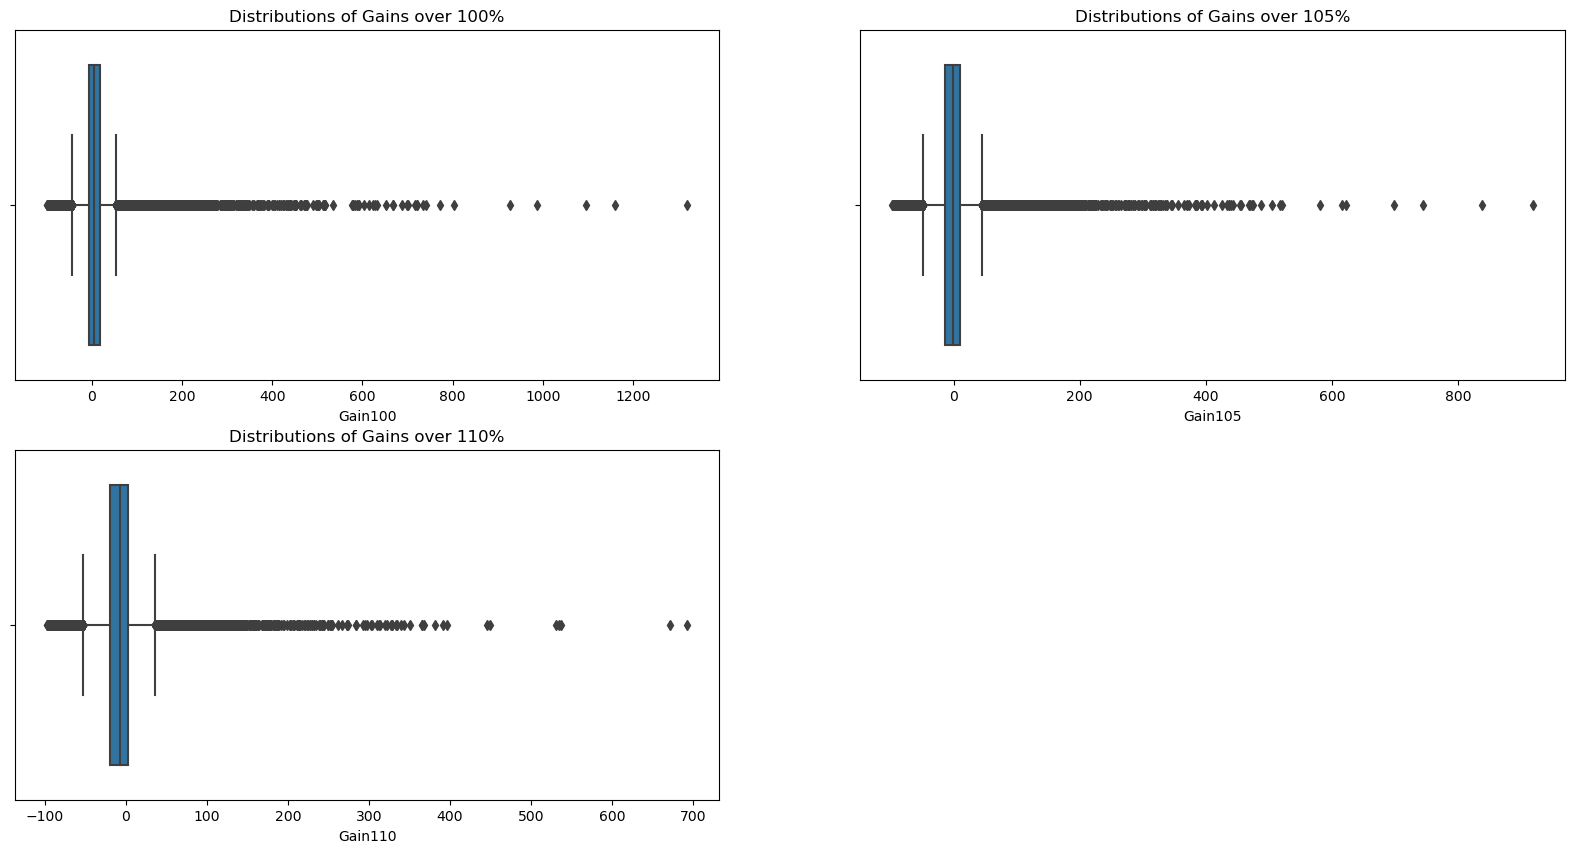

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=data, x="Gain100")
plt.title("Distributions of Gains over 100%")
plt.subplot(2,2,2)
sns.boxplot(data=data, x="Gain105")
plt.title("Distributions of Gains over 105%")
plt.subplot(2,2,3)
sns.boxplot(data=data, x="Gain110")
plt.title("Distributions of Gains over 110%")
plt.show()

In [14]:
print("---------------------------------------------------------------------------\nGain% over 100 (Q1, Q2, Q3)\n")
print(data["Gain100"].quantile(0.25),"%, ", data["Gain100"].quantile(0.50),"%, ", data["Gain100"].quantile(0.75),"%, ")
print("---------------------------------------------------------------------------\nGain% over 105 (Q1, Q2, Q3)\n")
print(data["Gain105"].quantile(0.25),"%, ", data["Gain105"].quantile(0.50),"%, ", data["Gain105"].quantile(0.75),"%, ")
print("---------------------------------------------------------------------------\nGain% over 110 (Q1, Q2, Q3)\n")
print(data["Gain110"].quantile(0.25),"%, ", data["Gain110"].quantile(0.50),"%, ", data["Gain110"].quantile(0.75),"%, ")

---------------------------------------------------------------------------
Gain% over 100 (Q1, Q2, Q3)

-7.6407126841242174 %,  4.9507209447844165 %,  16.987024622132644 %, 
---------------------------------------------------------------------------
Gain% over 105 (Q1, Q2, Q3)

-13.763700987690056 %,  -1.4536269569823268 %,  9.532406953186758 %, 
---------------------------------------------------------------------------
Gain% over 110 (Q1, Q2, Q3)

-19.23664627518469 %,  -7.116577129439216 %,  3.0051228469444906 %, 


In [15]:
data["Greater100"]=data["Gain100"] > 0
data["Greater105"]=data["Gain105"] > 0
data["Greater110"]=data["Gain110"] > 0

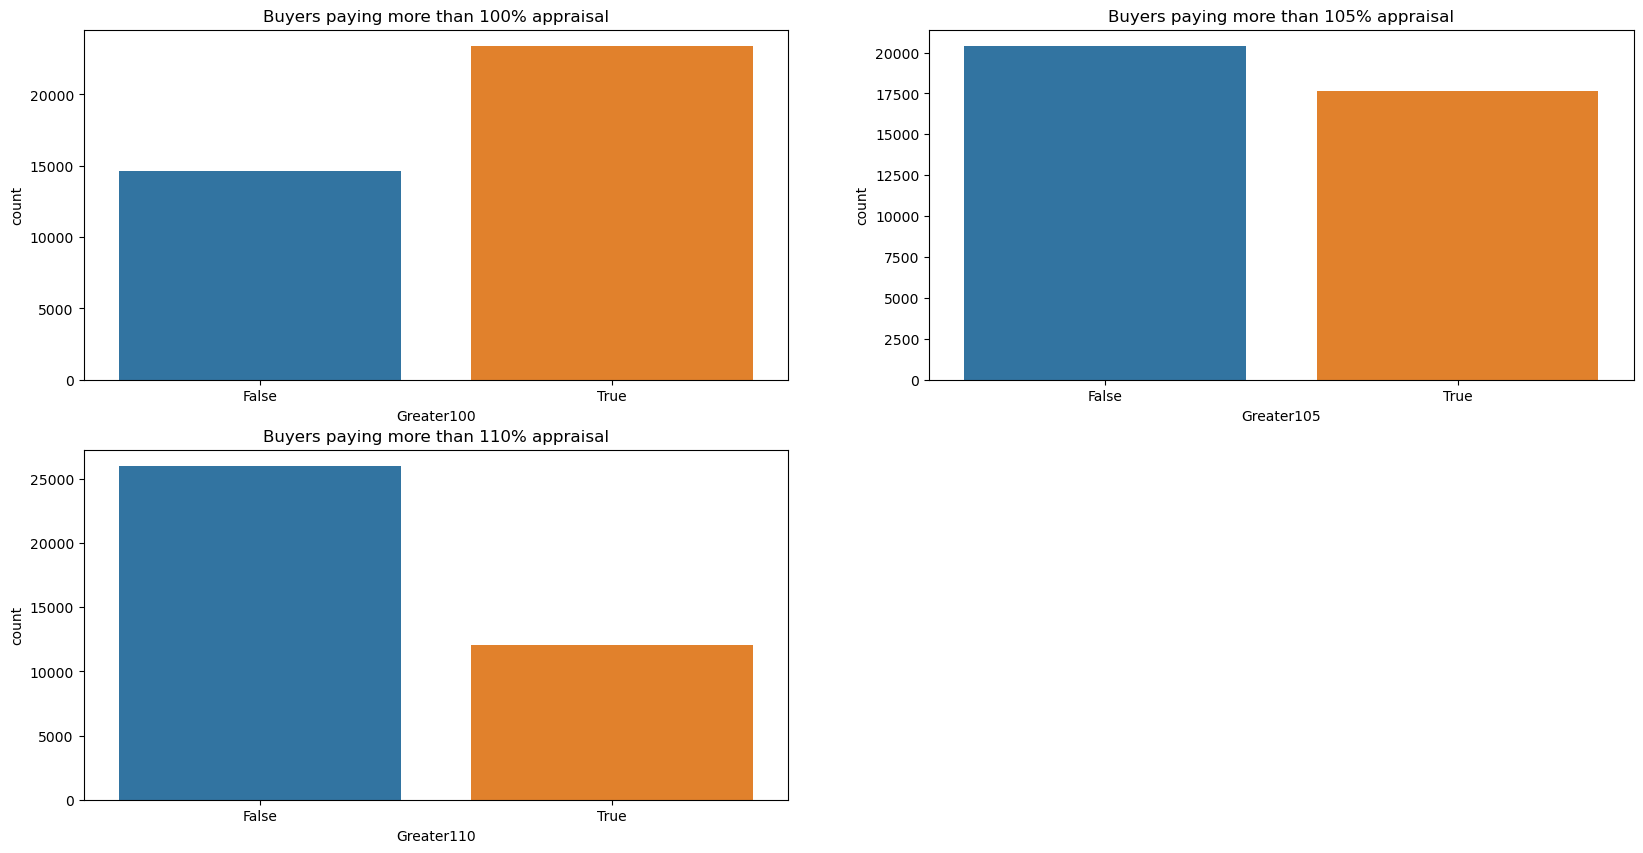

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data=data, x="Greater100")
plt.title("Buyers paying more than 100% appraisal")
plt.subplot(2,2,2)
sns.countplot(data=data, x="Greater105")
plt.title("Buyers paying more than 105% appraisal")
plt.subplot(2,2,3)
sns.countplot(data=data, x="Greater110")
plt.title("Buyers paying more than 110% appraisal")
plt.show()

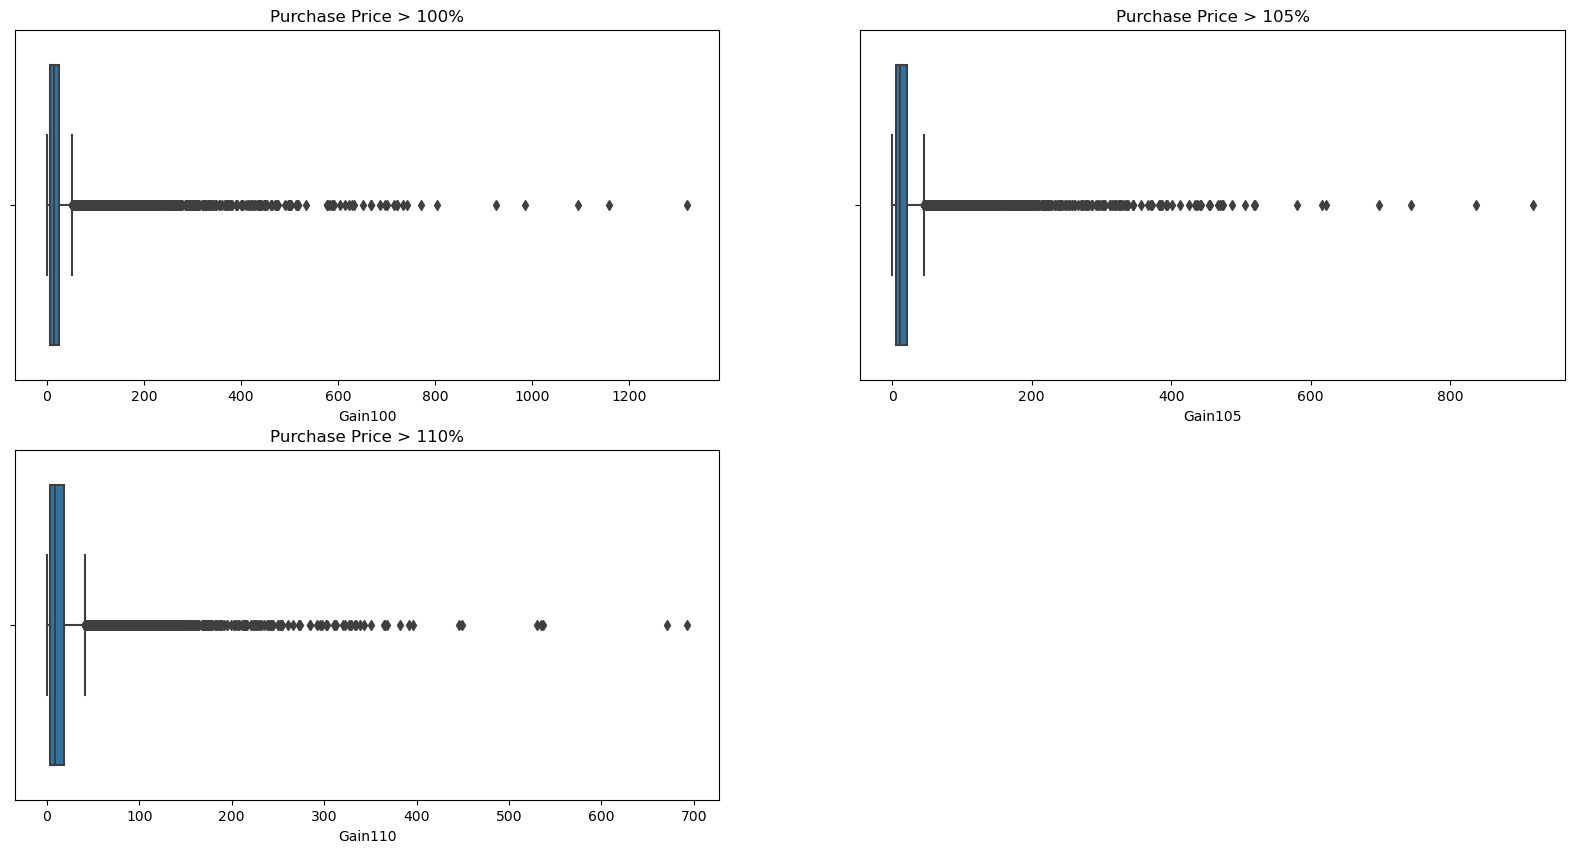

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=data[data["Greater100"]], x="Gain100")
plt.title("Purchase Price > 100%")
plt.subplot(2,2,2)
sns.boxplot(data=data[data["Greater105"]], x="Gain105")
plt.title("Purchase Price > 105%")
plt.subplot(2,2,3)
sns.boxplot(data=data[data["Greater110"]], x="Gain110")
plt.title("Purchase Price > 110%")
plt.show()

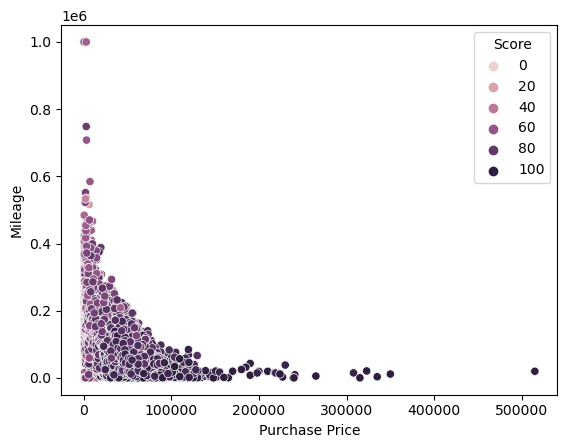

In [18]:
sns.scatterplot(data=data, x="Purchase Price", y="Mileage", hue="Score")
plt.show()

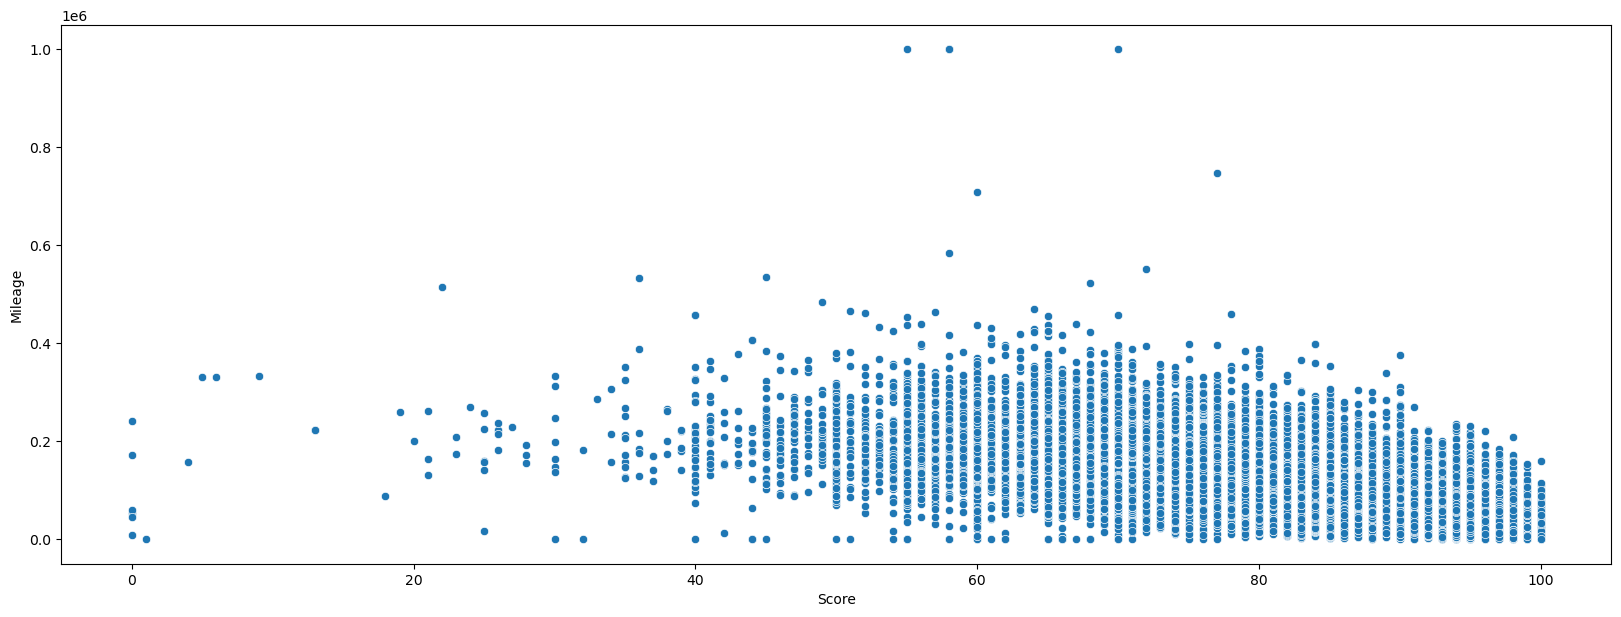

In [19]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=data, x="Score", y="Mileage")
plt.show()

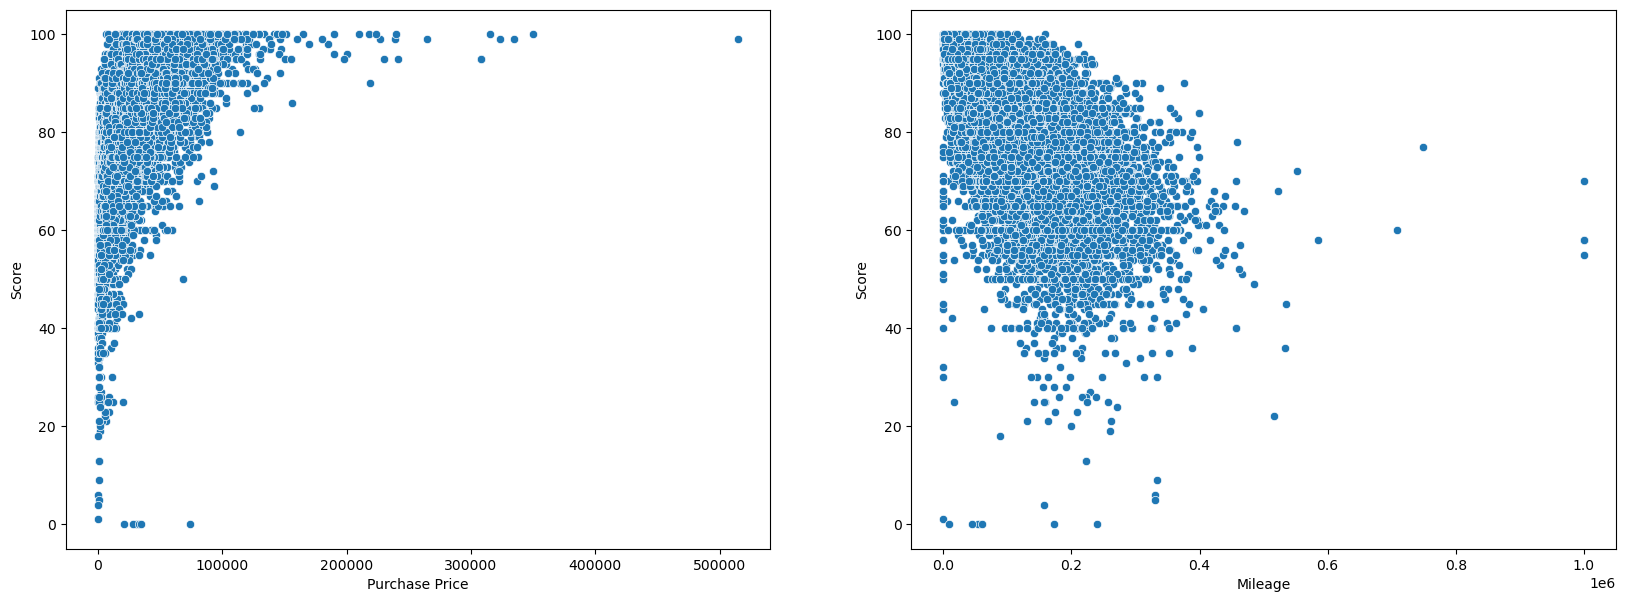

In [20]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.scatterplot(data=data, x="Purchase Price", y="Score")
plt.subplot(1,2,2)
sns.scatterplot(data=data, x="Mileage", y="Score")
plt.show()

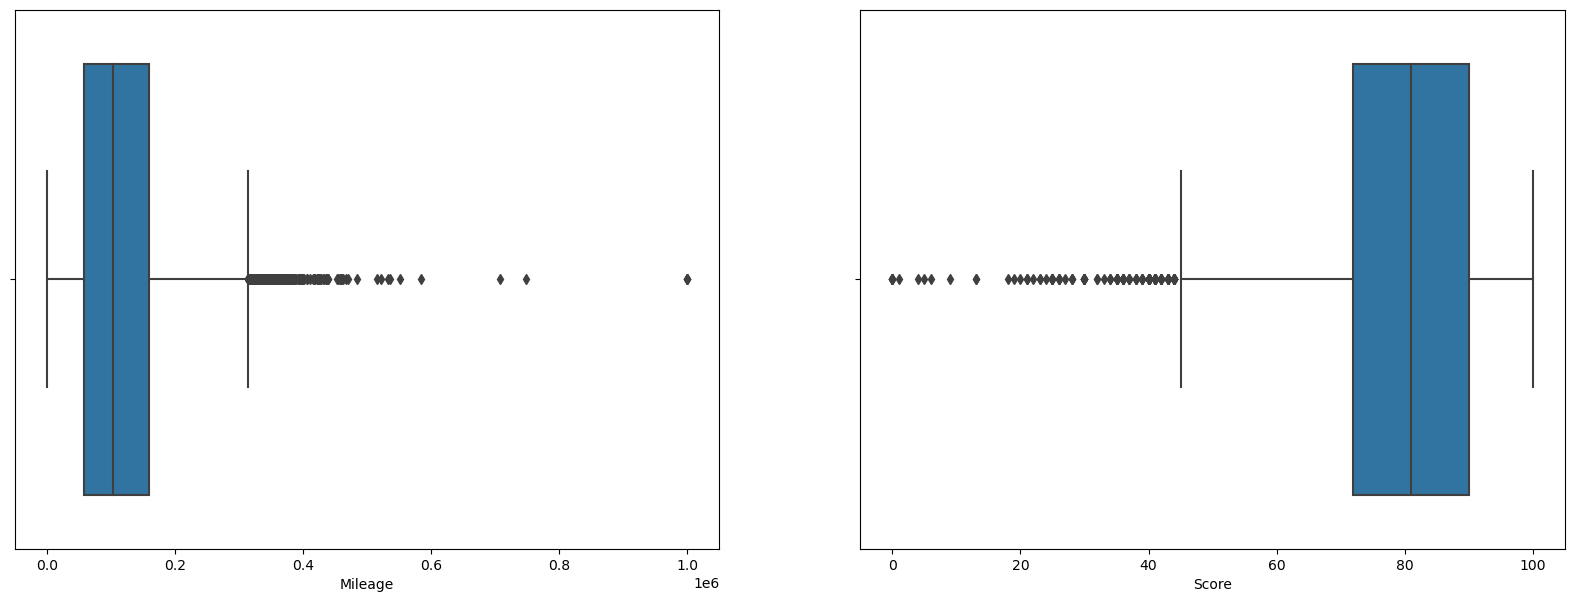

In [21]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.boxplot(data=data, x="Mileage")
plt.subplot(1,2,2)
sns.boxplot(data=data, x="Score")
plt.show()

In [22]:
print("---------------------------------------------------------------------------\nMileage (Q1, Q2, Q3)\n")
print(data["Mileage"].quantile(0.25), data["Mileage"].quantile(0.50), data["Mileage"].quantile(0.75))
print("---------------------------------------------------------------------------\nVehicle Score 105 (Q1, Q2, Q3)\n")
print(data["Score"].quantile(0.25), data["Score"].quantile(0.50), data["Score"].quantile(0.75))

---------------------------------------------------------------------------
Mileage (Q1, Q2, Q3)

57234.0 103523.5 160018.25
---------------------------------------------------------------------------
Vehicle Score 105 (Q1, Q2, Q3)

72.0 81.0 90.0


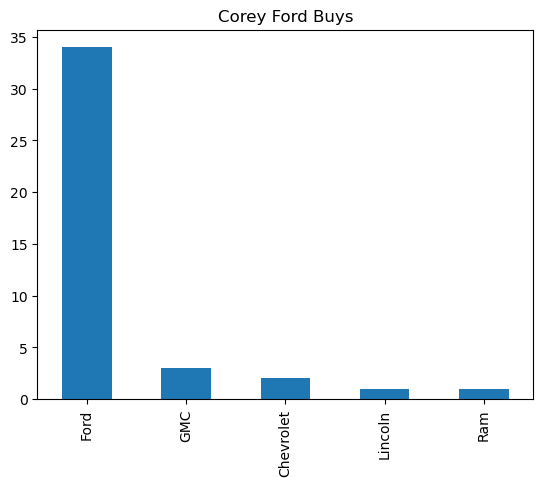

In [23]:
data[data["Buyer"] == "Corey Ford"]["Make"].value_counts().plot(kind="bar")
plt.title("Corey Ford Buys")
plt.show()

## Feature Extraction and Lead Score

In [24]:
def loyalty_index(data: pd.DataFrame, buyer: str, make: str, model: str):
    buyer_count = len(data["Buyer"][data["Buyer"] == buyer])
    brand_buys = len(data["Buyer"][(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)])
    loyalty_index = brand_buys / buyer_count
    return loyalty_index

In [25]:
def gain_score(result, buyer:str):
    
    buyer_row = result[(result['Buyer'] == buyer)]
    
    if(buyer_row["Gain110"].values[0] > 0):
        return (buyer_row["Gain110"].values[0]/100)*buyer_row["Greater110"].values[0]
    elif(buyer_row["Gain105"].values[0] > 0):
        return (buyer_row["Gain105"].values[0]/100)*buyer_row["Greater105"].values[0]*.75
    elif(buyer_row["Gain100"].values[0] > 0):
        return (buyer_row["Gain100"].values[0]/100)*buyer_row["Greater100"].values[0]*.5
    else:
        return (buyer_row["Gain100"].values[0]/100)*(buyer_row["Purchase Count"].values[0] - buyer_row["Greater100"].values[0])
    

In [26]:
def lead_score(result: pd.DataFrame, buyer:str):
   
    score = 0
    
    buyer_row = result[result["Buyer"] == buyer]

    if(buyer_row["Score"].values[0] < result['Score'].quantile(0.25)):
        score += .5
    elif(buyer_row["Score"].values[0] < result['Score'].quantile(0.75)):
        score += 1
    else:
        score += .5
        
    if(buyer_row["Mileage"].values[0] < result['Mileage'].quantile(0.25)):
        score += .5
    elif(buyer_row["Mileage"].values[0] < result['Mileage'].quantile(0.75)):
        score += 1
    else:
        score += .5

        
    score += buyer_row["Consistent Buys"].values[0]
    score += buyer_row["Gain Score"].values[0]
    
    return score

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def filter_dataset(df: pd.DataFrame, make: str, model: str):
    # Filter the DataFrame for the specified make and model
    filtered_df = df[(df['Make'] == make) & (df['Model'] == model)]

    # Group by 'Buyer' and calculate the mean of other columns
    result = filtered_df.groupby(['Buyer', 'Make', 'Model']).agg({
        'Purchase Price': 'mean',  # Calculate the mean purchase price
        "90": 'mean',                 # Calculate the mean for column '90'
        "95": 'mean',                 # Calculate the mean for column '95'
        "100": 'mean',                # Calculate the mean for column '100'
        "105": 'mean',                # Calculate the mean for column '105'
        "110": 'mean',                # Calculate the mean for column '110'
        "Score": 'mean',
        "Mileage": "mean",
        "Gain100": "mean",
        "Gain105": "mean",
        "Gain110": "mean",
        "Greater100": "sum",
        "Greater105": "sum",
        "Greater110": "sum",
    }).reset_index()

    # Count the number of purchases per buyer
    purchase_count = filtered_df['Buyer'].value_counts().reset_index()
    purchase_count.columns = ['Buyer', 'Purchase Count']  # Rename columns for clarity

    result = pd.merge(result, purchase_count, on='Buyer', how='left')  # Merge on 'Buyer' column
    result['Loyalty Index'] = result['Buyer'].apply(lambda x: loyalty_index(df, x, make, model))
    result['Consistent Buys'] = result['Loyalty Index']*result['Purchase Count']
    result["Gain Score"] = result['Buyer'].apply(lambda x: gain_score(result, x))
    
    scaler = MinMaxScaler()
    
    result['Consistent Buys'] = scaler.fit_transform(result['Consistent Buys'].values.reshape(-1, 1))
    result['Gain Score'] = scaler.fit_transform(result['Gain Score'].values.reshape(-1, 1))
    result['Lead Score'] = result['Buyer'].apply(lambda x: lead_score(result, x))
    
    return result


result = filter_dataset(data, "Ford", "F-150")  # Filter the dataset for Ford F-150
result = result.sort_values(by='Greater100', ascending=False)  # Sort the result by 'Purchase Count'
result.reset_index(drop=True, inplace=True)  # Reset the index and modify the DataFrame in place
result  # Display the final result

,Buyer,Make,Model,Purchase Price,90,95,100,105,110,Score,...,Gain105,Gain110,Greater100,Greater105,Greater110,Purchase Count,Loyalty Index,Consistent Buys,Gain Score,Lead Score
0,Automobiles Paille Inc.,Ford,F-150,40558.582353,34366.923529,36579.258824,38791.458824,41003.717647,43216.094118,83.182353,...,-1.035085,-6.144906,106,74,53,170,0.186199,0.583199,1.000000,3.583199
1,Bridge Valley,Ford,F-150,32314.000000,28192.150000,30089.345000,31994.940000,33892.615000,35790.260000,82.140000,...,-3.339506,-8.544254,100,80,54,200,0.233100,0.858986,0.878782,3.737768
2,Gateway Leasing,Ford,F-150,43851.582734,38428.129496,40859.251799,43290.287770,45721.352518,48152.510791,86.187050,...,-3.411196,-8.318198,70,55,39,139,0.390449,1.000000,0.826115,3.326115
3,Gateway Leasing - East,Ford,F-150,38084.785714,32904.028571,35041.057143,37178.071429,39315.100000,41452.185714,87.257143,...,-3.203583,-8.221419,38,24,15,70,0.288066,0.371482,0.800068,2.671551
4,Sundance Chevrolet,Ford,F-150,29128.048780,23686.682927,25288.048780,26889.317073,28490.609756,30091.975610,83.439024,...,4.350331,-1.271896,33,27,17,41,0.079304,0.059818,0.842239,2.902057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Ganada Limited - Deals On Wheels,Ford,F-150,8000.000000,9484.000000,10403.000000,11323.000000,12243.000000,13163.000000,56.000000,...,-34.656538,-39.223581,0,0,0,1,0.040000,0.000639,0.725844,2.226483
327,George Gee Automotive,Ford,F-150,38050.000000,34135.000000,36299.000000,38463.000000,40627.000000,42791.000000,80.000000,...,-6.343072,-11.079433,0,0,0,1,0.500000,0.009116,0.753866,2.262981
328,Gilles Gauthier O/A Auto Gilles Gauthier,Ford,F-150,5200.000000,4646.000000,5295.000000,5945.000000,6595.000000,7244.000000,60.000000,...,-21.152388,-28.216455,0,0,0,1,0.062500,0.001054,0.742510,1.743564
329,Glovis Canada Inc,Ford,F-150,20000.000000,19566.000000,21150.000000,22735.000000,24320.000000,25904.000000,86.000000,...,-17.763158,-22.791847,0,0,0,1,0.500000,0.009116,0.743007,2.252123


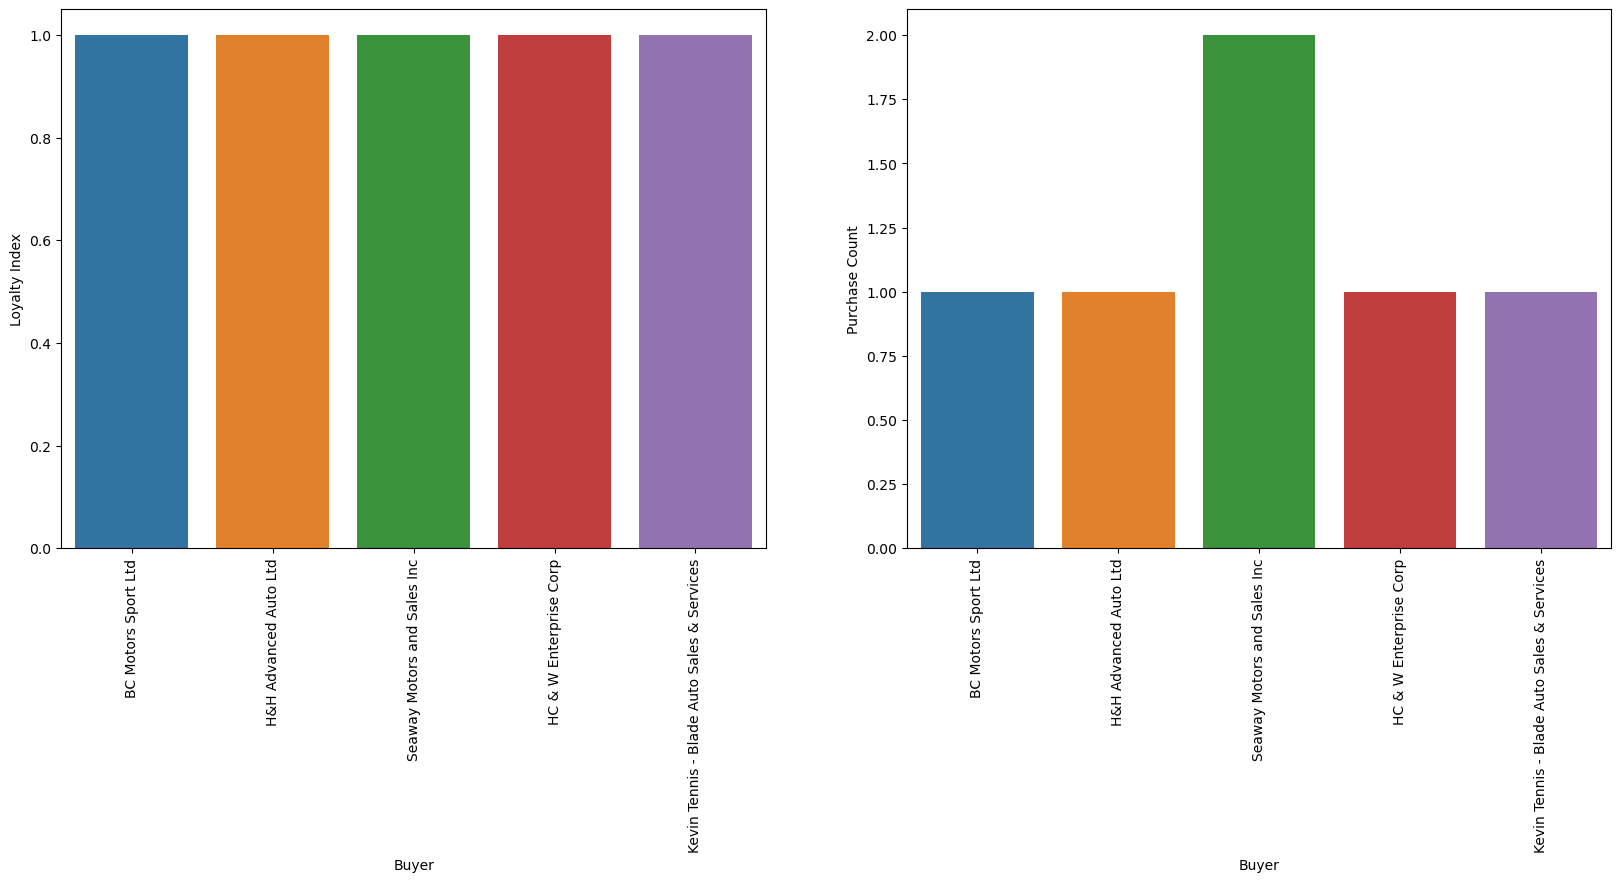

In [28]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=result.sort_values(by="Loyalty Index", ascending=False).head(), x="Buyer", y="Loyalty Index")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
ax2 = sns.barplot(data=result.sort_values(by="Loyalty Index", ascending=False).head(), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

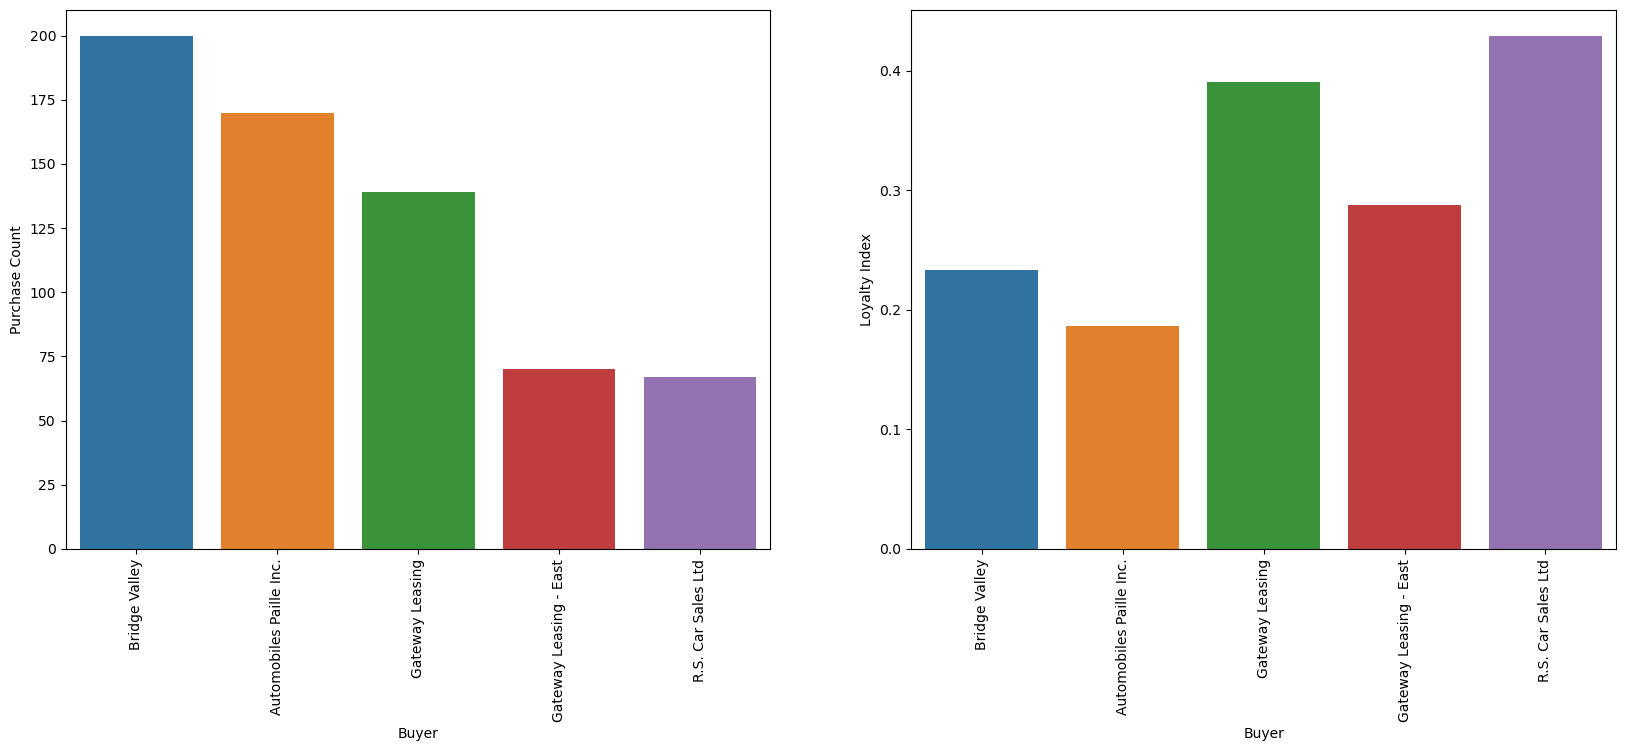

In [29]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(), x="Buyer", y="Loyalty Index")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

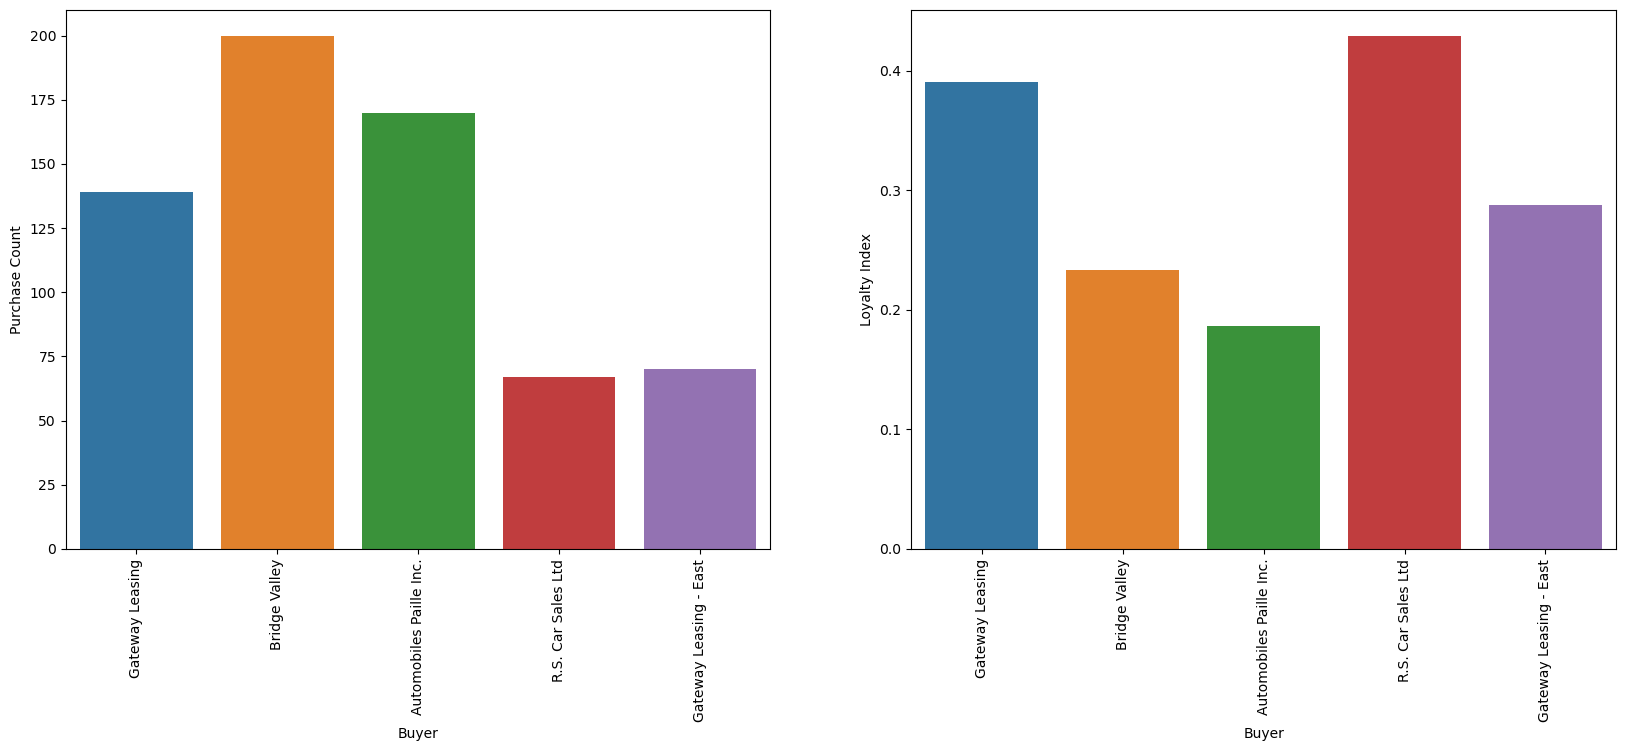

In [30]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result.sort_values(by="Consistent Buys", ascending=False).head(), x="Buyer", y="Loyalty Index")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result.sort_values(by="Consistent Buys", ascending=False).head(), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

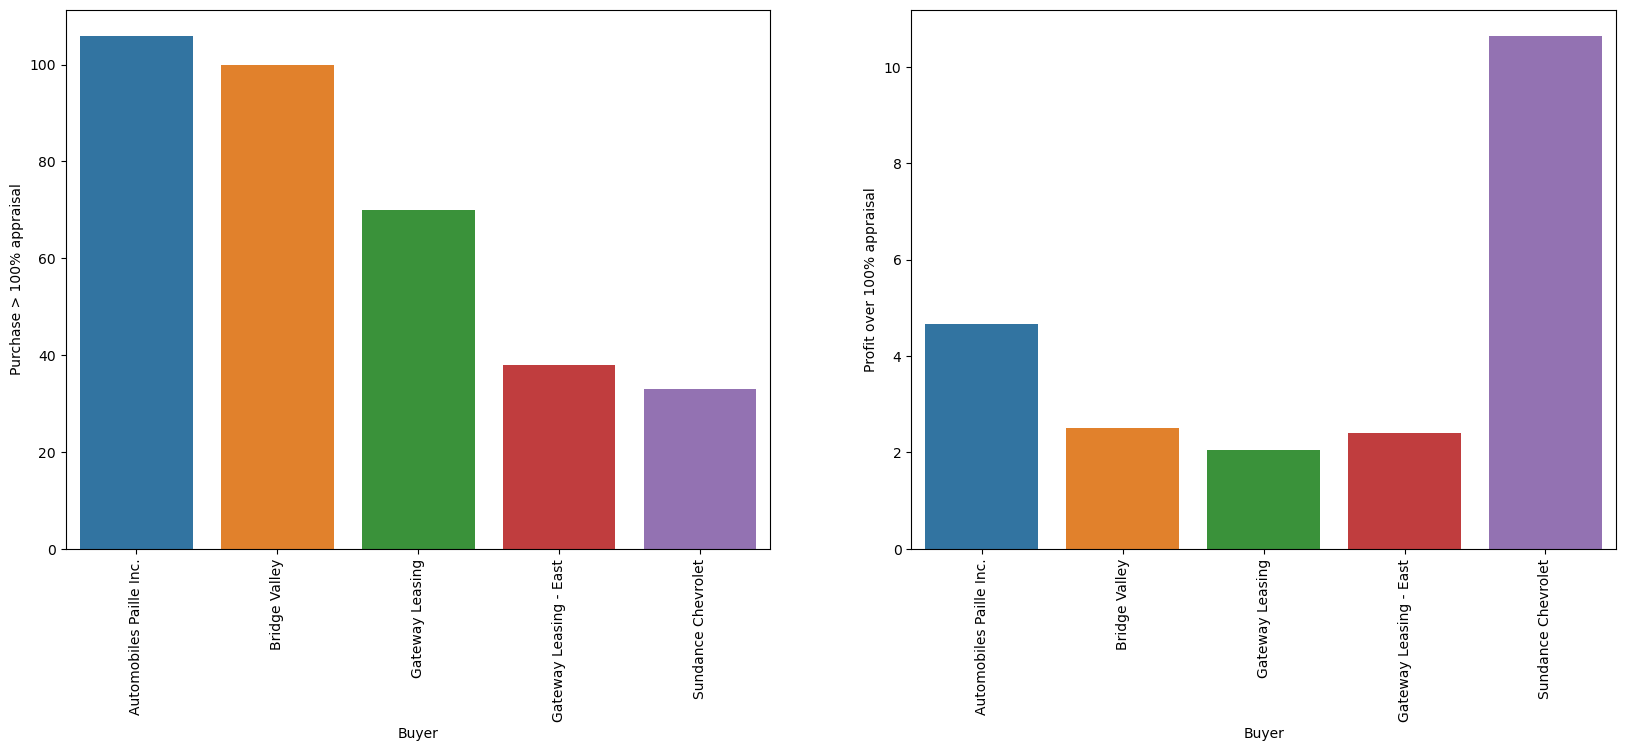

In [31]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Greater100", ascending=False).head(), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Greater100", ascending=False).head(), x="Buyer", y="Gain100")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.ylabel("Profit over 100% appraisal")
plt.show()

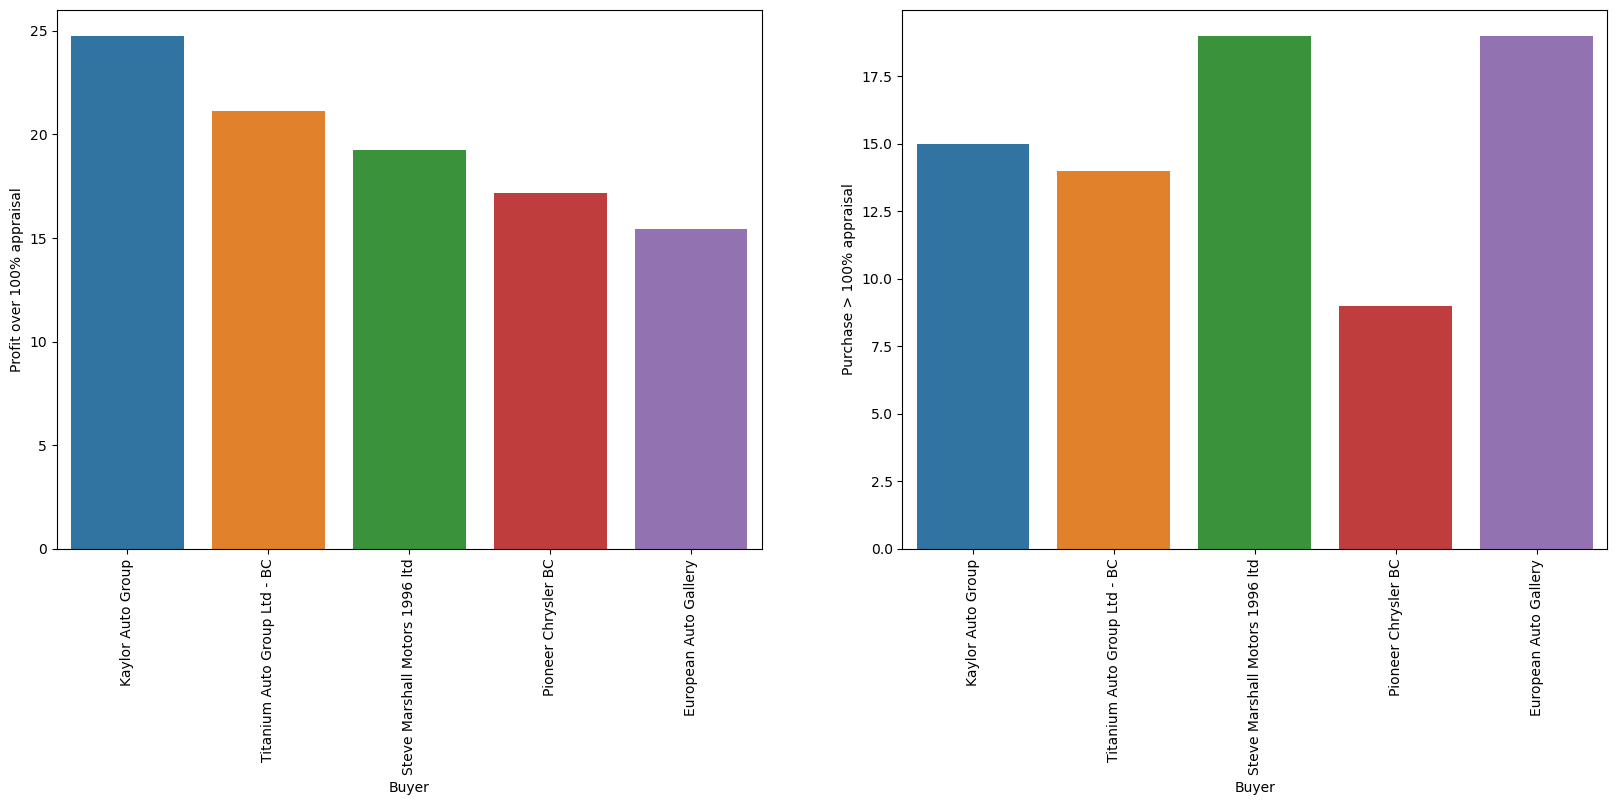

In [32]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain100", ascending=False).head(), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain100", ascending=False).head(), x="Buyer", y="Gain100")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.ylabel("Profit over 100% appraisal")
plt.show()

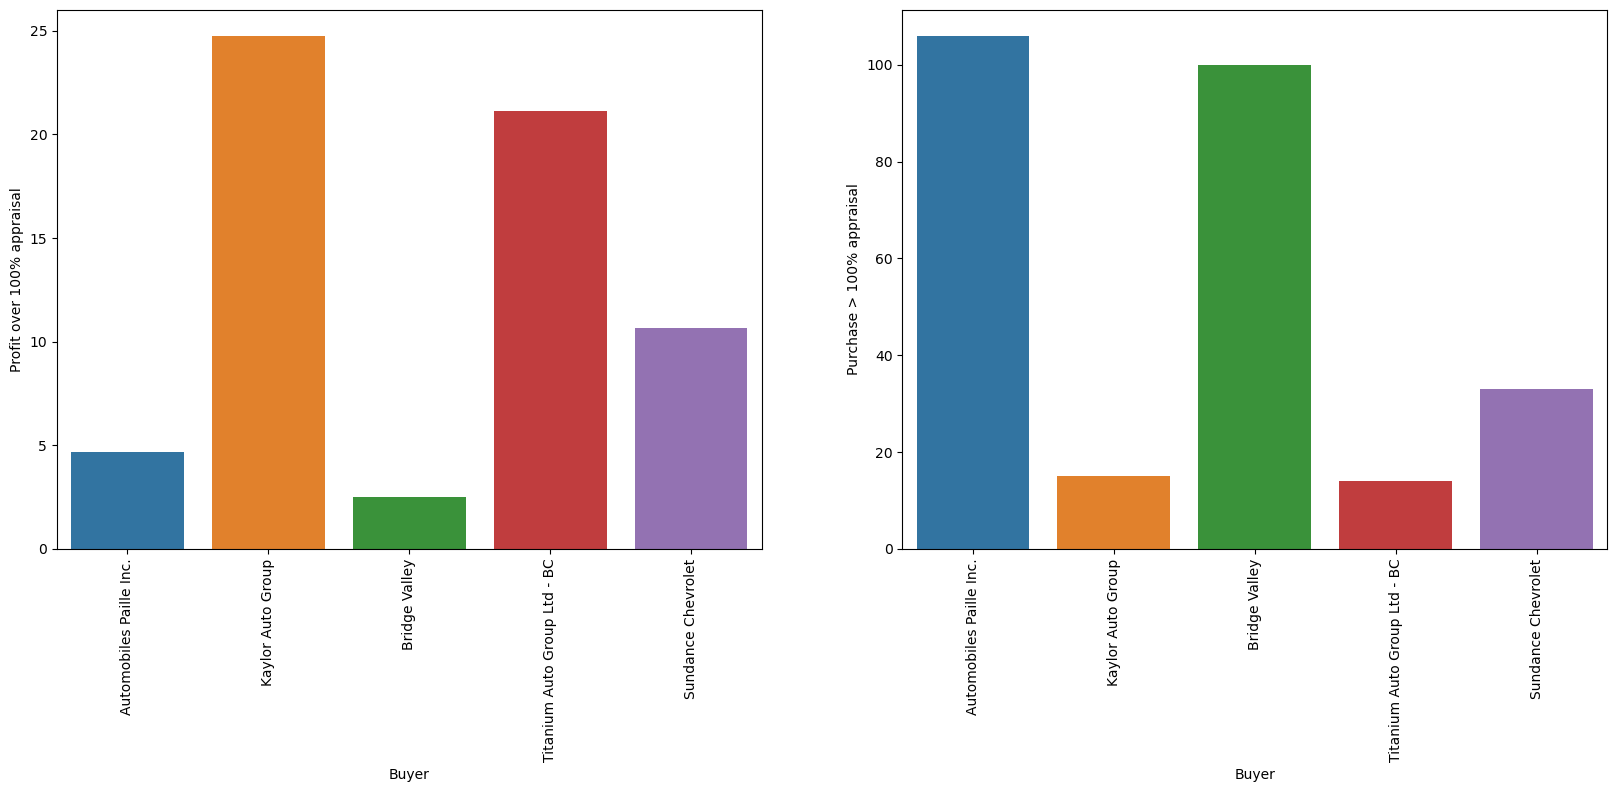

In [33]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain Score", ascending=False).head(), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain Score", ascending=False).head(), x="Buyer", y="Gain100")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.ylabel("Profit over 100% appraisal")
plt.show()

In [34]:
result["Lead Score"].min(), result["Lead Score"].max()

(1.0294415880104395, 3.737768429553091)

In [35]:
result.head()

,Buyer,Make,Model,Purchase Price,90,95,100,105,110,Score,...,Gain105,Gain110,Greater100,Greater105,Greater110,Purchase Count,Loyalty Index,Consistent Buys,Gain Score,Lead Score
0,Automobiles Paille Inc.,Ford,F-150,40558.582353,34366.923529,36579.258824,38791.458824,41003.717647,43216.094118,83.182353,...,-1.035085,-6.144906,106,74,53,170,0.186199,0.583199,1.000000,3.583199
1,Bridge Valley,Ford,F-150,32314.000000,28192.150000,30089.345000,31994.940000,33892.615000,35790.260000,82.140000,...,-3.339506,-8.544254,100,80,54,200,0.233100,0.858986,0.878782,3.737768
2,Gateway Leasing,Ford,F-150,43851.582734,38428.129496,40859.251799,43290.287770,45721.352518,48152.510791,86.187050,...,-3.411196,-8.318198,70,55,39,139,0.390449,1.000000,0.826115,3.326115
3,Gateway Leasing - East,Ford,F-150,38084.785714,32904.028571,35041.057143,37178.071429,39315.100000,41452.185714,87.257143,...,-3.203583,-8.221419,38,24,15,70,0.288066,0.371482,0.800068,2.671551
4,Sundance Chevrolet,Ford,F-150,29128.048780,23686.682927,25288.048780,26889.317073,28490.609756,30091.975610,83.439024,...,4.350331,-1.271896,33,27,17,41,0.079304,0.059818,0.842239,2.902057


## Final Recommendations Analysis

In [36]:
def recommend_buyers_all(result: pd.DataFrame, appraisal_value="110", num=5):
    buyers_dataframe = result[["Buyer", appraisal_value, "Loyalty Index", "Lead Score", "Purchase Count", "Consistent Buys", "Gain Score"]]
    limit = 10
    buyers_dataframe = buyers_dataframe[buyers_dataframe["Purchase Count"] >= limit]
    lead_score = buyers_dataframe.sort_values(by="Lead Score", ascending=False)[["Buyer", "Lead Score", "Purchase Count", "Gain Score"]]
    loyality_index = buyers_dataframe.sort_values(by="Loyalty Index", ascending=False)[["Buyer", "Loyalty Index", "Purchase Count", "Gain Score"]]
    purchase_count = buyers_dataframe.sort_values(by="Purchase Count", ascending=False)[["Buyer", "Purchase Count", "Gain Score"]]
    consistent_buys = buyers_dataframe.sort_values(by="Consistent Buys", ascending=False)[["Buyer", "Consistent Buys", "Purchase Count", "Gain Score"]]
    gain_score = buyers_dataframe.sort_values(by="Gain Score", ascending=False)[["Buyer", "Purchase Count", "Gain Score"]]
    
    print("By Lead Score: ")
    print(lead_score.head(num))
    lead_score.to_csv("lead_score.csv")
    print("\n---------------------------------------------------------\n")
    print("By Gain Score: ")
    print(gain_score.head(num))
    gain_score.to_csv("gain_score.csv")
    print("\n---------------------------------------------------------\n")
    print("By Purchase Count: ")
    print(purchase_count.head(num))
    purchase_count.to_csv("purchase_count.csv")
    print("\n---------------------------------------------------------\n")
    print("By Consistent Buys: ")
    print(consistent_buys.head(num))
    consistent_buys.to_csv("consistent_buys.csv")
    print("\n---------------------------------------------------------\n")

In [37]:
recommend_buyers_all(result)

By Lead Score: 
                      Buyer  Lead Score  Purchase Count  Gain Score
1             Bridge Valley    3.737768             200    0.878782
0   Automobiles Paille Inc.    3.583199             170    1.000000
2           Gateway Leasing    3.326115             139    0.826115
5        R.S. Car Sales Ltd    3.085968              67    0.555808
10        Kaylor Auto Group    2.965976              15    0.905985

---------------------------------------------------------

By Gain Score: 
                           Buyer  Purchase Count  Gain Score
0        Automobiles Paille Inc.             170    1.000000
10             Kaylor Auto Group              15    0.905985
1                  Bridge Valley             200    0.878782
12  Titanium Auto Group Ltd - BC              18    0.855320
4             Sundance Chevrolet              41    0.842239

---------------------------------------------------------

By Purchase Count: 
                     Buyer  Purchase Count  Gain Score

In [38]:
recommend_buyers_all(result, num=10)

By Lead Score: 
                             Buyer  Lead Score  Purchase Count  Gain Score
1                    Bridge Valley    3.737768             200    0.878782
0          Automobiles Paille Inc.    3.583199             170    1.000000
2                  Gateway Leasing    3.326115             139    0.826115
5               R.S. Car Sales Ltd    3.085968              67    0.555808
10               Kaylor Auto Group    2.965976              15    0.905985
12    Titanium Auto Group Ltd - BC    2.944333              18    0.855320
4               Sundance Chevrolet    2.902057              41    0.842239
6   Steve Marshall Motors 1996 ltd    2.900502              21    0.840846
15                 Hinton Chrysler    2.836493              17    0.764625
21             Explorer Van Canada    2.824848              13    0.775514

---------------------------------------------------------

By Gain Score: 
                             Buyer  Purchase Count  Gain Score
0          Automobil

In [39]:
def recommend_buyers(result: pd.DataFrame, num=5, by: str = "Lead Score"):

    buyers_dataframe = result[["Buyer", "Purchase Count", "Gain Score",  "Consistent Buys", "Purchase Price", "Lead Score", "Greater100", "Greater105", "Greater110"]]
    limit = 10
    buyers_dataframe = buyers_dataframe[buyers_dataframe["Purchase Count"] >= limit]
    buyers_dataframe.sort_values(by=by, ascending=False, inplace=True)
    
    return buyers_dataframe.head(num)

recommendations = recommend_buyers(result)
recommendations

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110
1,Bridge Valley,200,0.878782,0.858986,32314.000000,3.737768,100,80,54
0,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,3.583199,106,74,53
2,Gateway Leasing,139,0.826115,1.000000,43851.582734,3.326115,70,55,39
5,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,3.085968,24,16,9
10,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.965976,15,15,13


In [40]:
recommend_buyers(result, num=10, by="Lead Score")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110
1,Bridge Valley,200,0.878782,0.858986,32314.000000,3.737768,100,80,54
0,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,3.583199,106,74,53
2,Gateway Leasing,139,0.826115,1.000000,43851.582734,3.326115,70,55,39
5,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,3.085968,24,16,9
10,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.965976,15,15,13
12,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.944333,14,13,12
4,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.902057,33,27,17
6,Steve Marshall Motors 1996 ltd,21,0.840846,0.059655,40938.095238,2.900502,19,15,14
15,Hinton Chrysler,17,0.764625,0.071868,34947.058824,2.836493,12,11,11
21,Explorer Van Canada,13,0.775514,0.049334,39803.846154,2.824848,9,5,3


In [41]:
recommend_buyers(result, num=10, by="Purchase Count")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110
1,Bridge Valley,200,0.878782,0.858986,32314.000000,3.737768,100,80,54
0,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,3.583199,106,74,53
2,Gateway Leasing,139,0.826115,1.000000,43851.582734,3.326115,70,55,39
3,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,2.671551,38,24,15
5,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,3.085968,24,16,9
17,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.171684,10,6,2
4,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.902057,33,27,17
13,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.793797,12,8,3
7,European Auto Gallery,31,0.770427,0.040058,24451.612903,2.810485,19,18,13
20,Marsh Auto Sales LLC,29,0.598525,0.227805,14169.310345,2.326330,10,6,3


In [42]:
recommend_buyers(result, num=10, by="Gain Score")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110
0,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,3.583199,106,74,53
10,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.965976,15,15,13
1,Bridge Valley,200,0.878782,0.858986,32314.000000,3.737768,100,80,54
12,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.944333,14,13,12
4,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.902057,33,27,17
6,Steve Marshall Motors 1996 ltd,21,0.840846,0.059655,40938.095238,2.900502,19,15,14
2,Gateway Leasing,139,0.826115,1.000000,43851.582734,3.326115,70,55,39
3,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,2.671551,38,24,15
8,Corey Ford,26,0.795996,0.303729,49421.153846,2.099725,18,13,6
23,Pioneer Chrysler BC,12,0.785285,0.006741,49783.333333,2.792026,9,7,6


In [43]:
recommend_buyers(result, num=10, by="Consistent Buys")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110
2,Gateway Leasing,139,0.826115,1.000000,43851.582734,3.326115,70,55,39
1,Bridge Valley,200,0.878782,0.858986,32314.000000,3.737768,100,80,54
0,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,3.583199,106,74,53
5,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,3.085968,24,16,9
3,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,2.671551,38,24,15
8,Corey Ford,26,0.795996,0.303729,49421.153846,2.099725,18,13,6
20,Marsh Auto Sales LLC,29,0.598525,0.227805,14169.310345,2.326330,10,6,3
13,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.793797,12,8,3
18,Auto Link Direct,13,0.759410,0.119680,54686.538462,1.879090,10,7,6
17,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.171684,10,6,2


In [44]:
recommend_buyers(result, num=10)

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110
1,Bridge Valley,200,0.878782,0.858986,32314.000000,3.737768,100,80,54
0,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,3.583199,106,74,53
2,Gateway Leasing,139,0.826115,1.000000,43851.582734,3.326115,70,55,39
5,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,3.085968,24,16,9
10,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.965976,15,15,13
12,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.944333,14,13,12
4,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.902057,33,27,17
6,Steve Marshall Motors 1996 ltd,21,0.840846,0.059655,40938.095238,2.900502,19,15,14
15,Hinton Chrysler,17,0.764625,0.071868,34947.058824,2.836493,12,11,11
21,Explorer Van Canada,13,0.775514,0.049334,39803.846154,2.824848,9,5,3


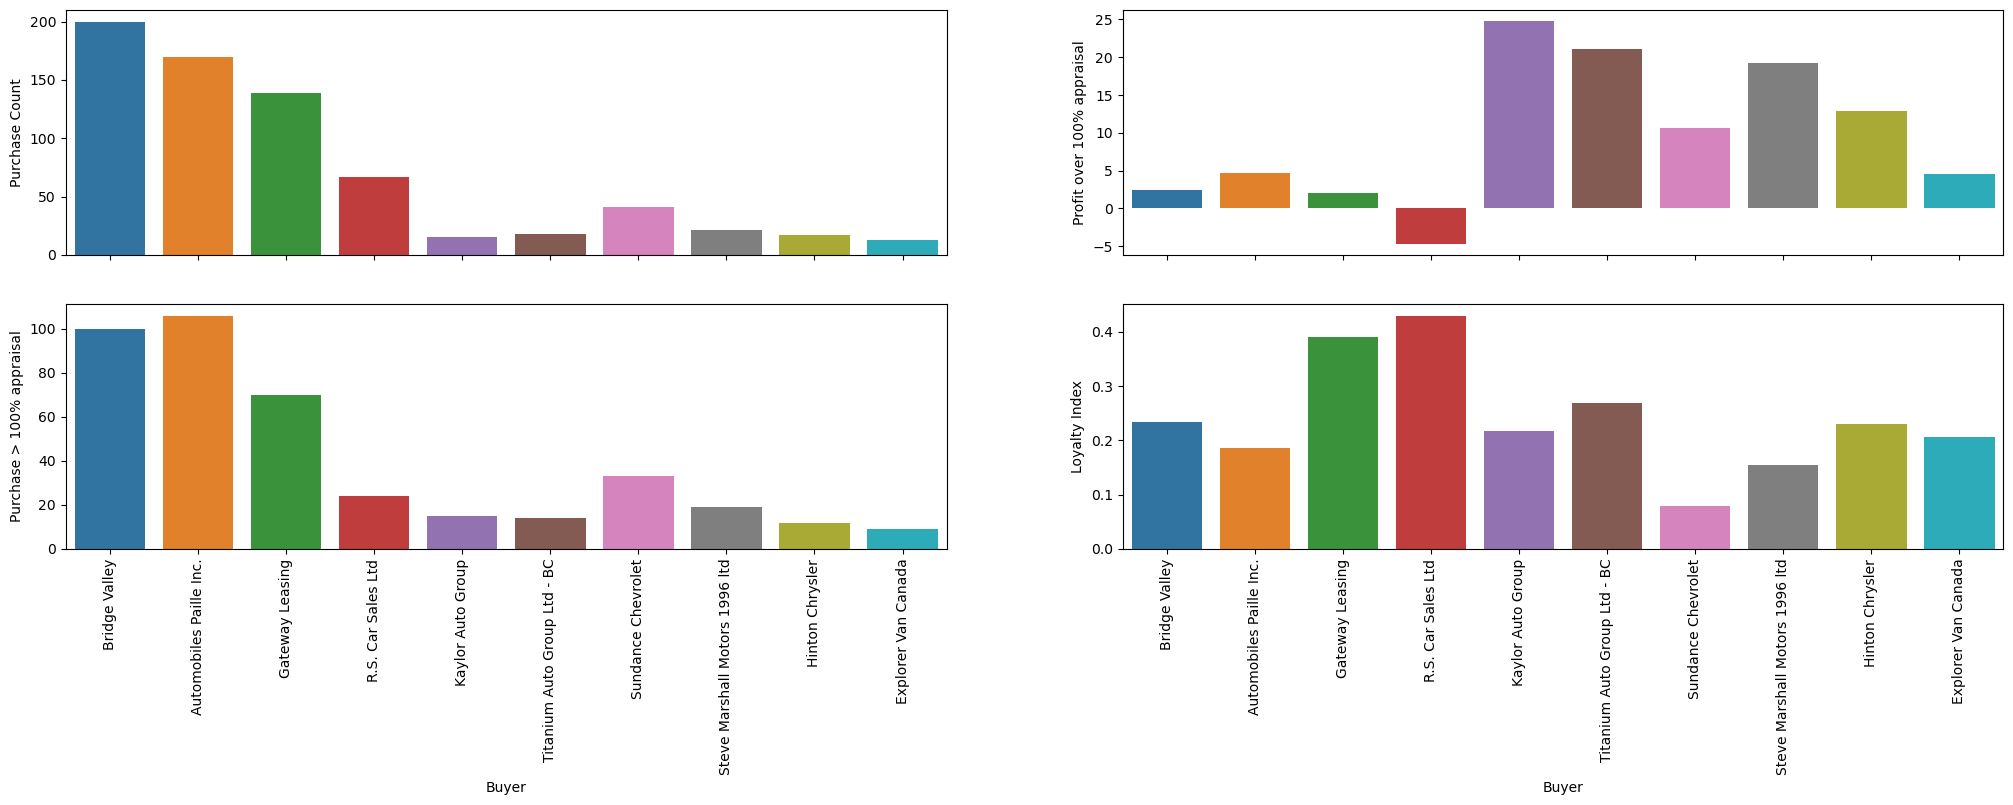

In [45]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Loyalty Index")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

## Unused Code

```
def last_three_month_buys(data: pd.DataFrame, buyer: str, make: str, model: str):
    
    df = data[["Buyer", "Date"]][(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)]
    new_df = df[(datetime.now().month - df["Date"].dt.month) <= 3]
    return len(new_df)
```

```
def calculate_profitability_score(data, buyer:str, make: str, model: str):

    transactions = data[(data['Buyer'] == buyer) & (data['Model'] == model) & (data['Make'] == make)]

    if len(transactions) == 0:
        return None 


    profitable_transactions = transactions[transactions['Purchase Price'] >= transactions['110']]

    profitable_frequency = len(profitable_transactions)
    
    profitability_score = profitable_frequency / len(transactions)

    return profitability_score
```


```
from sklearn.preprocessing import MinMaxScaler

def purchase_power_index(result: pd.DataFrame):
    """
    Calculate the Purchase Power Index based on the number and average value of transactions.
    :param df: DataFrame with columns 'purchase_count' and 'avg_purchase_price'.
    :return: Purchase Power Index.
    """
    
    power_index = result['Purchase Count'] * result['Purchase Price']
    # Reshape the data for Min-Max scaling
    power_index_reshaped = power_index.values.reshape(-1, 1)

    scaler = MinMaxScaler()
    scaled_power_index = scaler.fit_transform(power_index_reshaped)
    return scaled_power_index.ravel()
```

```
def plot_results(recommendations: pd.DataFrame):
    plt.figure(figsize=(40,25))
    
    # Plot 1
    plt.subplot(2,3,1)
    ax1 = sns.barplot(data=recommendations, x="Buyer", y="Lead Score")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    # Plot 2
    plt.subplot(2,3,2)
    ax2 = sns.barplot(data=recommendations, x="Buyer", y="Consistent Buys")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    
    # Plot 3
    plt.subplot(2,3,3)
    ax3 = sns.barplot(data=recommendations, x="Buyer", y="Gain Score")
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

    # Plot 4
    plt.subplot(2,3,4)
    ax4 = sns.barplot(data=recommendations, x="Buyer", y="Purchase Price")
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
    
    # Plot 5
    plt.subplot(2,3,5)
    ax5 = sns.barplot(data=recommendations, x="Buyer", y="Purchase Count")
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)

    plt.show()
```